confusion_matrix is at the bottom ↓

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import libraries
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from numpy import array 
from numpy import argmax 
from math import sqrt
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

df = pd.read_csv("data-stage2.csv")
df = df.drop(columns = ['Unnamed: 0'])
df = pd.get_dummies(df, columns = ['category'])
df.head()


,amt,is_fraud,hour,trans_count_7d,trans_count_30d,time_diff,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,0,1,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,0,1,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,0,1,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [2]:
df_y_removed = df.drop(columns = ['is_fraud'])

# standardization
scaler = StandardScaler()
scaled = scaler.fit_transform(df_y_removed)
df_standardized = pd.DataFrame(scaled, columns = ['amt', 'hour', 'trans_count_7d', 'trans_count_30d', 'time_diff', 'category_entertainment', 'category_food_dining', 'category_gas_transport','category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel']) 
# add is_fraud column back into data set
df_standardized['is_fraud'] = df['is_fraud']

# split standardized data
train, test = train_test_split(df_standardized, test_size = 0.2, random_state = 12)
X_train, y_train = train.drop(columns = ['is_fraud']), train['is_fraud']
X_test, y_test = test.drop(columns = ['is_fraud']), test['is_fraud']

In [3]:
# oversampling (using training set)
# can lead to overfitting

smote = SMOTE()

# fit predictor and target variable
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Original Dataset Shape', Counter(y_train))
print('Resample (Over) Dataset Shape', Counter(y_train_smote))

Original Dataset Shape Counter({0: 1474173, 1: 7742})
Resample (Over) Dataset Shape Counter({0: 1474173, 1: 1474173})


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#medel
model = keras.models.Sequential([keras.Input(shape=(19),)])

layer1_num_units = np.ceil(.9*19)
layer2_num_units = np.ceil(.8*layer1_num_units)
layer3_num_units = np.ceil(.6*layer2_num_units)
layer4_num_units = np.ceil(.7*layer3_num_units)

# Create hidden layers
model.add(
    layers.Dense(
        units=layer1_num_units,
        activation="relu",
    )
)

model.add(
   layers.Dense(
        units=layer2_num_units,
        activation="relu",
    )
)

model.add(
   layers.Dense(
        units=layer3_num_units,
        activation="relu",
    )
)

model.add(
   layers.Dense(
        units=layer4_num_units,
        activation="relu",
    )
)

# Single output layer
model.add(
    layers.Dense(
        units=1, 
        activation="sigmoid"
    )
)

# Compile model, tune learning rate
model.compile(
    optimizer=keras.optimizers.SGD(1e-2),
    loss=keras.losses.BinaryCrossentropy(), 
    metrics=[
        keras.metrics.BinaryAccuracy(name="accuracy"),
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall")
    ]
)

In [5]:
print("Fit model on training data")
history = model.fit(
    X_train_smote,
    y_train_smote,
    # Change to 50 to get full results, for faster testing keep at 10
    epochs=10,
    validation_data=(X_test, y_test)
)

Fit model on training data
Epoch 1/10
92136/92136 [==============================] - 170s 2ms/step - loss: 0.1146 - accuracy: 0.9503 - precision: 0.9565 - recall: 0.9435 - val_loss: 0.1061 - val_accuracy: 0.9599 - val_precision: 0.1093 - val_recall: 0.9492
Epoch 2/10
92136/92136 [==============================] - 161s 2ms/step - loss: 0.0832 - accuracy: 0.9644 - precision: 0.9650 - recall: 0.9638 - val_loss: 0.0719 - val_accuracy: 0.9710 - val_precision: 0.1441 - val_recall: 0.9382
Epoch 3/10
92136/92136 [==============================] - 166s 2ms/step - loss: 0.0739 - accuracy: 0.9693 - precision: 0.9676 - recall: 0.9710 - val_loss: 0.0641 - val_accuracy: 0.9735 - val_precision: 0.1567 - val_recall: 0.9460
Epoch 4/10
92136/92136 [==============================] - 177s 2ms/step - loss: 0.0701 - accuracy: 0.9710 - precision: 0.9686 - recall: 0.9735 - val_loss: 0.0649 - val_accuracy: 0.9732 - val_precision: 0.1556 - val_recall: 0.9481
Epoch 5/10
92136/92136 [=============================

In [6]:
#evaluate
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
11578/11578 [==============================] - 18s 2ms/step - loss: 0.0501 - accuracy: 0.9808 - precision: 0.2030 - recall: 0.9324
test loss, test acc: [0.050061941146850586, 0.9807924628257751, 0.20303410291671753, 0.9324253797531128]


In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

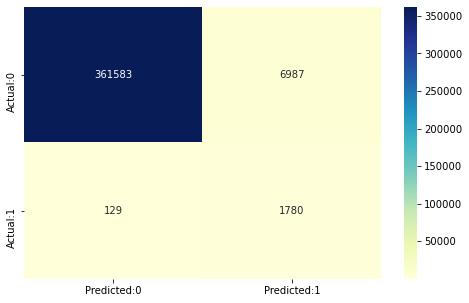

In [22]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd',cmap = "YlGnBu");

In [26]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

print('The acuuracy of the model (TP+TN/(TP+TN+FP+FN))   = ',(TP+TN)/float(TP+TN+FP+FN))
print('The Missclassification    (1-Accuracy)            = ',1-((TP+TN)/float(TP+TN+FP+FN)))
print('True Positive Rate        (TP/(TP+FN))            = ',TP/float(TP+FN))
print('True Negative Rate        (TN/(TN+FP))            = ',TN/float(TN+FP))
print('Positive Predictive value (TP/(TP+FP))            = ',TP/float(TP+FP))
print('Negative predictive Value (TN/(TN+FN))            = ',TN/float(TN+FN))

The acuuracy of the model (TP+TN/(TP+TN+FP+FN))   =  0.9807924335792312
The Missclassification    (1-Accuracy)            =  0.019207566420768818
True Positive Rate        (TP/(TP+FN))            =  0.9324253535882661
True Negative Rate        (TN/(TN+FP))            =  0.9810429497788751
Positive Predictive value (TP/(TP+FP))            =  0.2030341051671039
Negative predictive Value (TN/(TN+FN))            =  0.9996433626752775
